In [1]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
# var_all=['u','v','w']
# Re_all=['Re900/','Re1800/','Re2700/']
# if Re_all[0]=='Re900/':
#   timesteps1=np.arange(590200,596000,200)
#   timesteps2=np.arange(596000,610000+1,1000)
#   timesteps=np.concatenate((timesteps1,timesteps2))
# elif Re_all[0]=='Re1800/':
#   timesteps=np.arange(616000,630000+1,1000)
# elif Re_all[0]=='Re2700/':
#   timesteps=np.arange(1368000,1386000+1,9000)

# var_all=['u','v','w','b']
var_all=['u','w']
ylabels=[r"$\langle$E$_{ux} \rangle_y$ [m$^{3}$ s$^{-2}]$",r"$\langle$E$_{wx} \rangle_y$ [m$^{3}$ s$^{-2}]$"]


Re_all=['Re1800/']

timesteps_all=[[0,2,4,6,8,10,11]]

hgts_c=[ 1.98]#, 10.17]
hgts_h=[ 2.26]#, 9.88]

save=False
outdir=""

<xarray.Dataset>
Dimensions:  (time: 12, z: 32, y: 16, xh: 16)
Coordinates:
  * time     (time) float64 1.8e+03 3.6e+03 5.4e+03 ... 1.98e+04 2.16e+04
  * z        (z) float64 0.2824 0.8473 1.412 1.977 ... 16.1 16.66 17.23 17.79
  * y        (y) float64 0.8558 2.567 4.279 5.991 ... 21.4 23.11 24.82 26.53
  * xh       (xh) float64 0.0 1.712 3.423 5.135 ... 20.54 22.25 23.96 25.67
Data variables:
    u        (time, z, y, xh) float64 ...
Plot spectra plot for time 0 at height [1.97693611]
Plot spectra plot for time 2 at height [1.97693611]
Plot spectra plot for time 4 at height [1.97693611]
Plot spectra plot for time 6 at height [1.97693611]
Plot spectra plot for time 8 at height [1.97693611]
Plot spectra plot for time 10 at height [1.97693611]
Plot spectra plot for time 11 at height [1.97693611]
<xarray.Dataset>
Dimensions:  (time: 12, y: 16, x: 16, zh: 32)
Coordinates:
  * time     (time) float64 1.8e+03 3.6e+03 5.4e+03 ... 1.98e+04 2.16e+04
  * y        (y) float64 0.8558 2.567 4.279 5

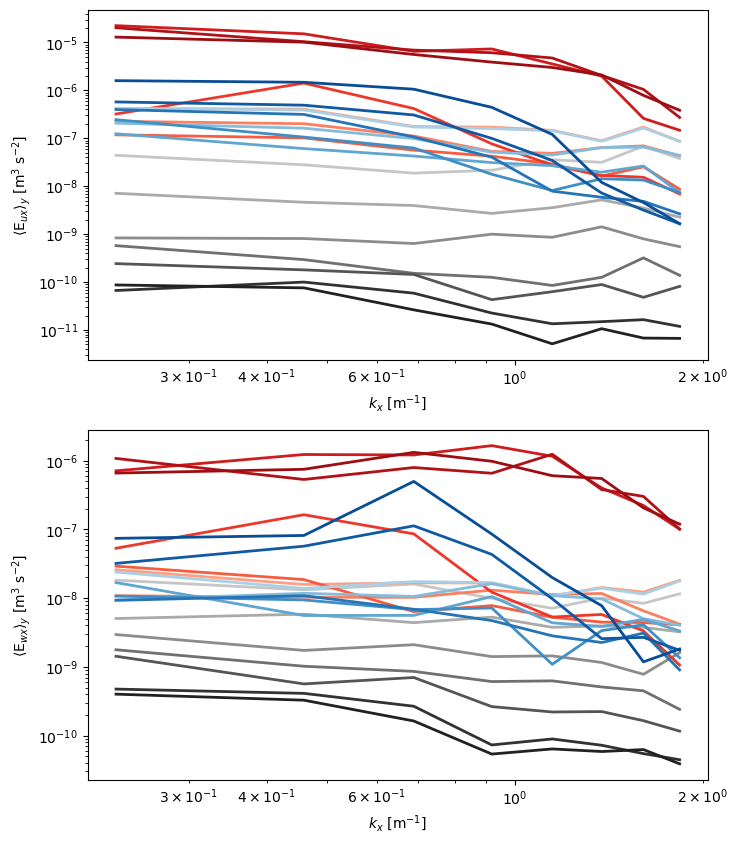

In [3]:
fig,axs=plt.subplots(len(var_all),1,figsize=(8,10))
paths=['../cases/SBL_smag_midReGridExtrap/','../cases/SBL_stats_midReGridExtrap/','../cases/SBL_global_midReGridExtrap/']
pathLabels=['Smagorinsky','Stats. res. extrap.','Phys. res. extrap.']
cmaps=['Greys','Reds','Blues']
# paths=['../cases/SBL_global_midGridReInterp/']
# pathLabels=['Re interp']

markers = ['.','x','*']
for iRe in range(len(Re_all)):
    timesteps=timesteps_all[iRe]
    dTime=timesteps[-1]-timesteps[0]
    pad = .2
    norm = matplotlib.colors.Normalize(vmin=timesteps[0]-3*pad*dTime, vmax=timesteps[-1]+pad*dTime) 
        
    for iLES in range(len(paths)):
        path=paths[iLES]
        cmap=matplotlib.colormaps[cmaps[iLES]]
        dTime=timesteps[-1]-timesteps[0]
        
        # color=colors[iLES]
        #marker=markers[iLES]
        for ivar in range(len(var_all)):

            var=var_all[ivar]
            ds = xr.open_dataset(path+var+'_longTime.nc')
            print(ds)

            Re=Re_all[iRe]
            timesteps=timesteps_all[iRe]
            nt=len(timesteps)

            for it,timestep in enumerate(timesteps):
                color=cmap(norm(timestep))
                
                try:
                    w=ds[var][timestep].values
                except:
                    break
                    
                try:
                  x=ds['xh'].values
                except:
                  x=ds['x'].values
                nx=len(x)
                dx=np.mean(np.diff(x))

                try:
                  y=ds['yh'].values
                except:
                  y=ds['y'].values
                ny=len(y)
    
                try:
                  z=ds['zh'].values
                  hgts=hgts_h
                except:
                  z=ds['z'].values
                  hgts=hgts_c

                
                for ihgt,hgt in enumerate(hgts):
                    hgt=hgts[ihgt]
                    # color=colors[ihgt]
                    k=[(np.abs(z - hgt)).argmin()]
        
                    kxy = 2*np.pi*np.fft.rfftfreq(nx,d=dx)
                    dk=kxy[1] # should be smallest wavenumber 2pi/(length_fline*dx)
                    lenf=len(kxy)# length_fline/2+1
                    sp = np.empty([ny,lenf])
                    #sp = np.empty([nF,avgt,length_yline,lenf])
                    #sP = np.empty([nF,lenf])
                    print('Plot spectra plot for time '+str(timestep)+' at height '+str(z[k]))
                    #Can make use of below loop if we want to loop through files but b/c the NBL is developping probably shouldn't
                    #  for F in range(nF): # File index
                    #    for i in range(avgt): # Time index
                    #      for ix in range(length_fline): # x (lon) index
                    #        for iy in range(length_yline): # y (lat) index
                    #          Wall[F,i,ix,iy]=fsall[F][nstart+i].variables['W'][nsall[F][nstart+i]][k][(Y1+iy),(X1+ix)]
                               # Wdiag = np.array([fsall[F][nstart+i].variables['W'][nsall[F][nstart+i]][k][Y1-count,X1] for count in range(length_fline)])
                                #normalize spectra values
                    #    for i in range(avgt):
                    #      for iy in range(length_yline):
        
                    #Different detrending options
                    #N = np.linspace(0,Wall[F,i,0,iy]-Wall[F,i,-1,iy],Wall[F,i,:,iy].shape[0])
                    #N = -np.mean(Wall[F,i,:,iy])
                    N=0 # detrending not necessary b/c periodic BCs
                    for j in range(ny):
                        sp_tmp = np.fft.rfft(w[k,j,:]+N)
                        # sp_tmp = np.fft.rfft(w[k,:,j]+N)
                        sp[j,:] = (np.power(sp_tmp.real,2) + np.power(sp_tmp.imag,2))*dx/2.0/np.pi/nx #missing factor of two from Durran paper neccesary for the parseval's thereom to work
                        #sp[j,-1] = sp[j,-1]/2.0 #Nyquist frequency (last entry by order of reqdiag) is unique for even pts FFT, so has twice the power
                        sp[j,0] = sp[j,0]/2.0 # Calculating the 0 wavenumber, won't be plotted on a log log but just to check the assumption of zero power at zero wavenumber for different detrending methods
                        #Confirming calcs throuch Parseval's theorem
                        #wsqr=np.sum(np.power(w[k,j],2))/nx/2.0
                        #wsqr_fft=np.sum(sp[j])*dk
                        #print(wsqr,wsqr_fft)
        
                    sP = np.mean(sp,axis=0)
                    power = abs(sP)

                    #,marker=marker
                    legEnd=''
                    if path==paths[-1]:
                        legEnd='    '+str(0.5*(timestep+1))+' h'
                    
                    axs[ivar].loglog(kxy[1:],power[1:],color=color,linewidth=2,label=pathLabels[iLES]+legEnd)

            axs[ivar].set_xlabel(r"$k_x$ [m$^{-1}$]")#,fontsize=fs)
            axs[ivar].set_ylabel(ylabels[ivar])#,fontsize=fs)   

In [4]:
timesteps_all=[[630000]]

for ivar in range(len(var_all)):
    var=var_all[ivar]
    for iRe in range(len(Re_all)):
        Re=Re_all[iRe]
        path='/glade/u/home/adac/work/DNSdata/DNS_SBL_L320/'+Re
        timesteps=timesteps_all[iRe]
        nt=len(timesteps)

        for it,timestep in enumerate(timesteps):
            
            ds = xr.open_dataset(path+var+str(timestep)+'.nc',decode_times=0)
            print(ds)

            w=ds[var][0].values

            try:
              x=ds['xh'].values
            except:
              x=ds['x'].values
            nx=len(x)
            dx=np.mean(np.diff(x))

            try:
              y=ds['yh'].values
            except:
              y=ds['y'].values
            ny=len(y)

            try:
              z=ds['zh'].values
              hgts=hgts_h
            except:
              z=ds['z'].values
              hgts=hgts_c

            for ihgt,hgt in enumerate(hgts):
                
                k=[(np.abs(z - hgt)).argmin()]
    
                kxy = 2*np.pi*np.fft.rfftfreq(nx,d=dx)
                dk=kxy[1] # should be smallest wavenumber 2pi/(length_fline*dx)
                lenf=len(kxy)# length_fline/2+1
                sp = np.empty([ny,lenf])
                #sp = np.empty([nF,avgt,length_yline,lenf])
                #sP = np.empty([nF,lenf])
                print('Plot spectra plot for time '+str(timestep)+' at height '+str(z[k]))
                #Can make use of below loop if we want to loop through files but b/c the NBL is developping probably shouldn't
                #  for F in range(nF): # File index
                #    for i in range(avgt): # Time index
                #      for ix in range(length_fline): # x (lon) index
                #        for iy in range(length_yline): # y (lat) index
                #          Wall[F,i,ix,iy]=fsall[F][nstart+i].variables['W'][nsall[F][nstart+i]][k][(Y1+iy),(X1+ix)]
                           # Wdiag = np.array([fsall[F][nstart+i].variables['W'][nsall[F][nstart+i]][k][Y1-count,X1] for count in range(length_fline)])
                            #normalize spectra values
                #    for i in range(avgt):
                #      for iy in range(length_yline):
    
                #Different detrending options
                #N = np.linspace(0,Wall[F,i,0,iy]-Wall[F,i,-1,iy],Wall[F,i,:,iy].shape[0])
                #N = -np.mean(Wall[F,i,:,iy])
                N=0 # detrending not necessary b/c periodic BCs
                for j in range(ny):
                    sp_tmp = np.fft.rfft(w[k,j,:]+N)
                    # sp_tmp = np.fft.rfft(w[k,:,j]+N)
                    sp[j,:] = (np.power(sp_tmp.real,2) + np.power(sp_tmp.imag,2))*dx/2.0/np.pi/nx #missing factor of two from Durran paper neccesary for the parseval's thereom to work
                    #sp[j,-1] = sp[j,-1]/2.0 #Nyquist frequency (last entry by order of reqdiag) is unique for even pts FFT, so has twice the power
                    sp[j,0] = sp[j,0]/2.0 # Calculating the 0 wavenumber, won't be plotted on a log log but just to check the assumption of zero power at zero wavenumber for different detrending methods
                    #Confirming calcs throuch Parseval's theorem
                    #wsqr=np.sum(np.power(w[k,j],2))/nx/2.0
                    #wsqr_fft=np.sum(sp[j])*dk
                    #print(wsqr,wsqr_fft)
    
                sP = np.mean(sp,axis=0)
                power = abs(sP)
    
                axs[ivar].loglog(kxy[1:],power[1:],'k--',linewidth=2,label='DNS 23 min 20 s')



<xarray.Dataset>
Dimensions:  (xh: 640, y: 640, z: 3328, time: 1)
Coordinates:
  * xh       (xh) float32 0.0 0.04279 0.08558 0.1284 ... 27.21 27.26 27.3 27.34
  * y        (y) float32 0.0214 0.06419 0.107 0.1498 ... 27.24 27.28 27.32 27.36
  * z        (z) float32 0.002716 0.008147 0.01358 0.01901 ... 18.06 18.07 18.07
  * time     (time) int32 -2147483647
Data variables:
    u        (time, z, y, xh) float32 ...
Plot spectra plot for time 630000 at height [1.9796517]
<xarray.Dataset>
Dimensions:  (x: 640, y: 640, zh: 3328, time: 1)
Coordinates:
  * x        (x) float32 0.0214 0.06419 0.107 0.1498 ... 27.24 27.28 27.32 27.36
  * y        (y) float32 0.0214 0.06419 0.107 0.1498 ... 27.24 27.28 27.32 27.36
  * zh       (zh) float32 0.0 0.005431 0.01086 0.01629 ... 18.06 18.06 18.07
  * time     (time) int32 -2147483647
Data variables:
    w        (time, zh, y, x) float32 ...
Plot spectra plot for time 630000 at height [2.2593555]


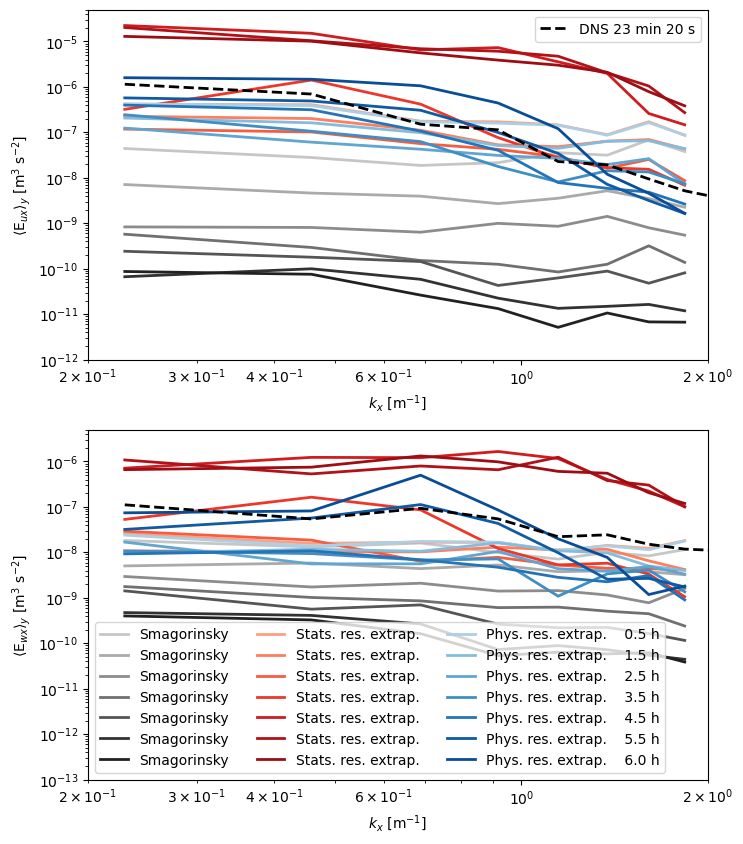

In [5]:
handles,labels=axs[1].get_legend_handles_labels()
# nLabel=len(labels)
axs[1].legend(ncol=3,handles=handles[:-1],labels=labels[:-1])
axs[0].legend(ncol=1,handles=handles[-1:],labels=labels[-1:])

for i in range(len(axs)):
    axs[i].set_xlim([2e-1,2e0])
axs[0].set_ylim([1e-12,5e-5])
axs[1].set_ylim([1e-13,5e-6])
# axs[0].set_ylim([1e-11,1e-6])
# axs[1].set_ylim([1e-12,1e-7])

fig

In [10]:
# save=True
if save:
    plt.figure(fig)
    fmts=["png","eps"]
    for fmt in fmts:
        plt.savefig("Spectra_longTime_gridExtrap."+fmt, format=fmt)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
# for ivar in range(len(var_all)):
#     var=var_all[ivar]
#     for iRe in range(len(Re_all)):
#         Re=Re_all[iRe]
#         path='/glade/u/home/adac/work/DNSdata/DNS_SBL_L320/'+Re
#         timesteps=timesteps_all[iRe]
#         nt=len(timesteps)
#         cmap=matplotlib.colormaps['jet_r']
#         dTime=timesteps[-1]-timesteps[0]
#         pad = .2
#         norm = matplotlib.colors.Normalize(vmin=timesteps[0]+pad*dTime, vmax=timesteps[-1]+pad*dTime) 
#         for it,timestep in enumerate(timesteps):
#             color=cmap(norm(timestep))
#             try:
#                 ds = xr.open_dataset(path+var+str(timestep)+'.nc',decode_times=0)
#                 print(ds)
#                 w=ds[var][0].values
#             except:
#                 print('no time')
#                 break

#             try:
#               x=ds['xh'].values
#             except:
#               x=ds['x'].values
#             nx=len(x)
#             dx=np.mean(np.diff(x))

#             try:
#               y=ds['yh'].values
#             except:
#               y=ds['y'].values
#             ny=len(y)

#             try:
#               z=ds['zh'].values
#             except:
#               z=ds['z'].values

#             for ihgt,hgt in enumerate(hgts):
#                 hgt=hgts[ihgt]
#                 k=[(np.abs(z - hgt)).argmin()]
    
#                 kxy = 2*np.pi*np.fft.rfftfreq(nx,d=dx)
#                 dk=kxy[1] # should be smallest wavenumber 2pi/(length_fline*dx)
#                 lenf=len(kxy)# length_fline/2+1
#                 sp = np.empty([ny,lenf])
#                 #sp = np.empty([nF,avgt,length_yline,lenf])
#                 #sP = np.empty([nF,lenf])
#                 print('Plot spectra plot for time '+str(timestep)+' at height '+str(z[k]))
#                 #Can make use of below loop if we want to loop through files but b/c the NBL is developping probably shouldn't
#                 #  for F in range(nF): # File index
#                 #    for i in range(avgt): # Time index
#                 #      for ix in range(length_fline): # x (lon) index
#                 #        for iy in range(length_yline): # y (lat) index
#                 #          Wall[F,i,ix,iy]=fsall[F][nstart+i].variables['W'][nsall[F][nstart+i]][k][(Y1+iy),(X1+ix)]
#                            # Wdiag = np.array([fsall[F][nstart+i].variables['W'][nsall[F][nstart+i]][k][Y1-count,X1] for count in range(length_fline)])
#                             #normalize spectra values
#                 #    for i in range(avgt):
#                 #      for iy in range(length_yline):
    
#                 #Different detrending options
#                 #N = np.linspace(0,Wall[F,i,0,iy]-Wall[F,i,-1,iy],Wall[F,i,:,iy].shape[0])
#                 #N = -np.mean(Wall[F,i,:,iy])
#                 N=0 # detrending not necessary b/c periodic BCs
#                 for j in range(ny):
#                     sp_tmp = np.fft.rfft(w[k,j,:]+N)
#                     sp[j,:] = (np.power(sp_tmp.real,2) + np.power(sp_tmp.imag,2))*dx/2.0/np.pi/nx #missing factor of two from Durran paper neccesary for the parseval's thereom to work
#                     #sp[j,-1] = sp[j,-1]/2.0 #Nyquist frequency (last entry by order of reqdiag) is unique for even pts FFT, so has twice the power
#                     sp[j,0] = sp[j,0]/2.0 # Calculating the 0 wavenumber, won't be plotted on a log log but just to check the assumption of zero power at zero wavenumber for different detrending methods
#                     #Confirming calcs throuch Parseval's theorem
#                     #wsqr=np.sum(np.power(w[k,j],2))/nx/2.0
#                     #wsqr_fft=np.sum(sp[j])*dk
#                     #print(wsqr,wsqr_fft)
    
#                 sP = np.mean(sp,axis=0)
#                 power = abs(sP)
    
#                 axs[ivar].loglog(kxy[1:],power[1:],linewidth=2,color=color,label='DNS '+str(int((timestep-616000)/10))+' s '+str(hgt)+' m')
#                 # axs[ivar].legend()
    
#     # ymin,ymax=axs[ivar].get_ylim()
#     # kLES=kxy[-1]/np.array([4*15,4*30,4*60])*2
#     # dxLES=['1.7','3.4','6.8'] # filter spacing (4*dx)
#     # text_x=np.array([7.5e-1, 7e-1, 5.9e-1])*kLES
#     # for ik in range(kLES.shape[0]):
#     #     axs[ivar].loglog((kLES[ik],kLES[ik]),(ymin,ymax),'k--')
#     #     print(2e-1*ymin)
#     #     axs[ivar].text(text_x[ik],2e-1*ymin,r"$\Delta f_h=$"+dxLES[ik]+" m")
#     # axs[ivar].tick_params('x', length=10, which='major')    

In [8]:
# del(fig,axs)
# fig,axs=plt.subplots(len(var_all),1,figsize=(10,16))
# hgts=[0.5]

In [9]:
# fig